In [1]:
##############################################################################################################
# DESCRIPTION: Se añaden al entrenamiento imágenes con zonas de negro eliminadas para j. El conjunto de 
#              validación es el mismo que para j.
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

class HyperParams:
    pass

IMG_PATH = "E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work_with_black_sections/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 100#200
hyperparams.BATCH_SIZE = 32
hyperparams.START_NEURONS = 8 # UNET

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0595
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3333

from tensorflow.keras.optimizers import Adam
hyperparams.OPTIMIZER = Adam(learning_rate=0.00005)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModel as train
import ReportsH as reports

In [4]:
##################
# MODEL DEFINITION
##################

import UnetD as model_factory

model = model_factory.buildModel(hyperparams)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 8)    80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 8)    584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 8)    0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [5]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 5e-05,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [6]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work_with_black_sections/
Noisy files:6036
Nitid files:6036
Read dataset. Path: E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work_with_black_sections/validation/
Noisy files:658
Nitid files:658


In [7]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)


hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1660, pci bus id: 0000:06:00.0, compute capability: 7.5

Epoch 1/100
189/189 [==============================] - 15s 53ms/step - loss: 0.0661 - mean_squared_error: 0.0661 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 2/100
189/189 [==============================] - 8s 42ms/step - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 3/100
189/189 [==============================] - 8s 42ms/step - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 4/100
189/189 [==============================] - 8s 42ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 5/100
189/189 [==============================] - 8s 42ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 6/100
189/189 [========

Epoch 50/100
189/189 [==============================] - 8s 42ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 51/100
189/189 [==============================] - 8s 42ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 52/100
189/189 [==============================] - 8s 42ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 53/100
189/189 [==============================] - 8s 42ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 54/100
189/189 [==============================] - 8s 42ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 55/100
189/189 [==============================] - 8s 42ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 56/1

189/189 [==============================] - 8s 42ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 100/100
189/189 [==============================] - 8s 42ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Train size:6036
Valid.size:658
--- 801.8613736629486 seconds ---


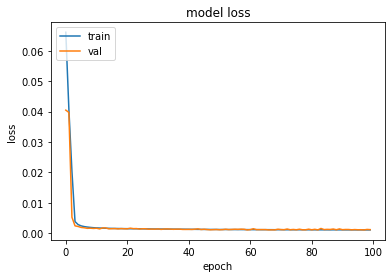

In [8]:
##################
# REPORTS
##################

reports.plotHistory( hist )

In [11]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = radiance_limits.nitid_max / 100.0
predictions_metrics, predictions_headers = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, save_pred = False, save_folder_name = "UNET-j", noisy_files = val_noisy_files, nitid_files = val_nitid_files, max_nitid= radiance_limits.nitid_max  )

Images count =658
Best MSE     =583 (0.89)
Best Accuracy=523 (0.79)
MSE-NZ   Pred=0.0011  Noisy=0.0124
MSE      Pred=0.0011  Noisy=0.0124
PSNR     Pred=19.2 dB Noisy=10.3 dB
Accuracy Pred=0.08    Noisy=0.03


In [ ]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
test_noisy, test_nitid = dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD, radiance_limits.nitid_max, True )

In [10]:
model.save('C:/Users/Marti/TFM/saves/unet-100_1000-k')

INFO:tensorflow:Assets written to: C:/Users/Marti/TFM/saves/unet-100_1000-k\assets
